In [1]:
# untuk mengelola data
import pandas as pd
import numpy as np

# untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# untuk pemodelan klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# contoh dataset sederhana
data = {
'waktu_belajar' : [2, 5, 1, 4, 3, 6, 2, 4, 5, 1],
'waktu_tidur' : [6, 8, 5, 7, 6, 9, 5, 8, 7, 4],
'main_game' : [3, 0, 5, 1, 2, 0, 4, 1, 0, 5],
'media_sosial' : [2, 1, 4, 1, 2, 1, 3, 1, 1, 4],
'lulus' : [0, 1, 0, 1, 1, 1, 0, 1, 1, 0] # 1 = Lulus, 0 = Tidak Lulus
}

# membuat dataframe
df = pd.DataFrame(data)

# menampilkan 5 data pertama
df.head()

,waktu_belajar,waktu_tidur,main_game,media_sosial,lulus
0,2,6,3,2,0
1,5,8,0,1,1
2,1,5,5,4,0
3,4,7,1,1,1
4,3,6,2,2,1


In [3]:
# memisahkan fitur (X) dan label (Y)
# keterangan : X = data aktivitas harian (waktu belajar, tidur, main game, dan media sosial), y = label/target yaitu Lulus (1 = Lulus, 0 = Tidak Lulus)
# df = DataFrame; df.head = menampilkan 5 baris pertama dari df
# .drop('lulus', axis=1) = menghapus kolom lulus dari df agar tidak dijadikan fitur 

X = df.drop('lulus', axis=1)
y = df['lulus']

In [4]:
# membagi data menjadi data latih dan data uji
# penjelasan : 70% data untuk melatih model(train); 30% data untuk menguji model(test); random state=42 agar hasilnya konsisten.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# melatih model naive bayes
# penjelasan : GaussianNB() adalah model Naive Bayes dari sklearn; .fit(X_train, y_train) untuk melatih model dengan data latihan

model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [6]:
# prediksi dan evaluasi model untuk mengetahui tingkat akurasi model Naive Bayes dan memprediksi kelulusan mahasiswa berdasarkan aktivitas hariannya

# prediksi menggunakan data asli
y_pred = model.predict(X_test)

# evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 1.0

Confusion Matrix:
[[3]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



C:\Users\Mahasiswa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


C:\Users\Mahasiswa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


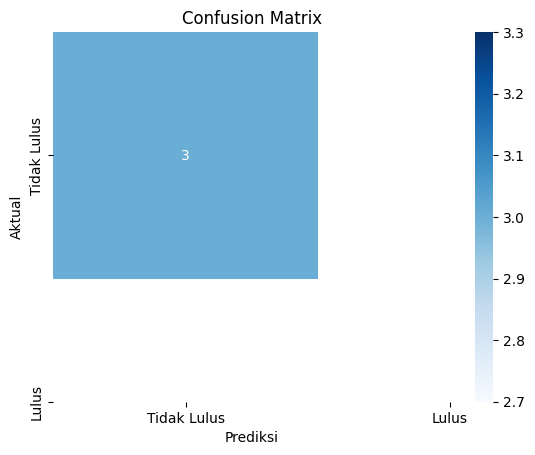

In [8]:
# membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# visualisasi confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Tidak Lulus", "Lulus"], yticklabels=["Tidak Lulus", "Lulus"])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# memprediksi data baru 
# contoh 4 jam belajar, 6 jam tidur, 2 jam main game, 1 jam medsos
data_baru = pd.DataFrame([[4, 6, 2, 1]], columns=X.columns)
prediksi = model.predict(data_baru)

# tampilkan hasil prediksi\
if prediksi[0] == 1: 
    print("Prediksi : Kemungkinan LULUS")
else:
    print("Prediksi : Kemungkinan TIDAK LULUS")

Prediksi : Kemungkinan LULUS


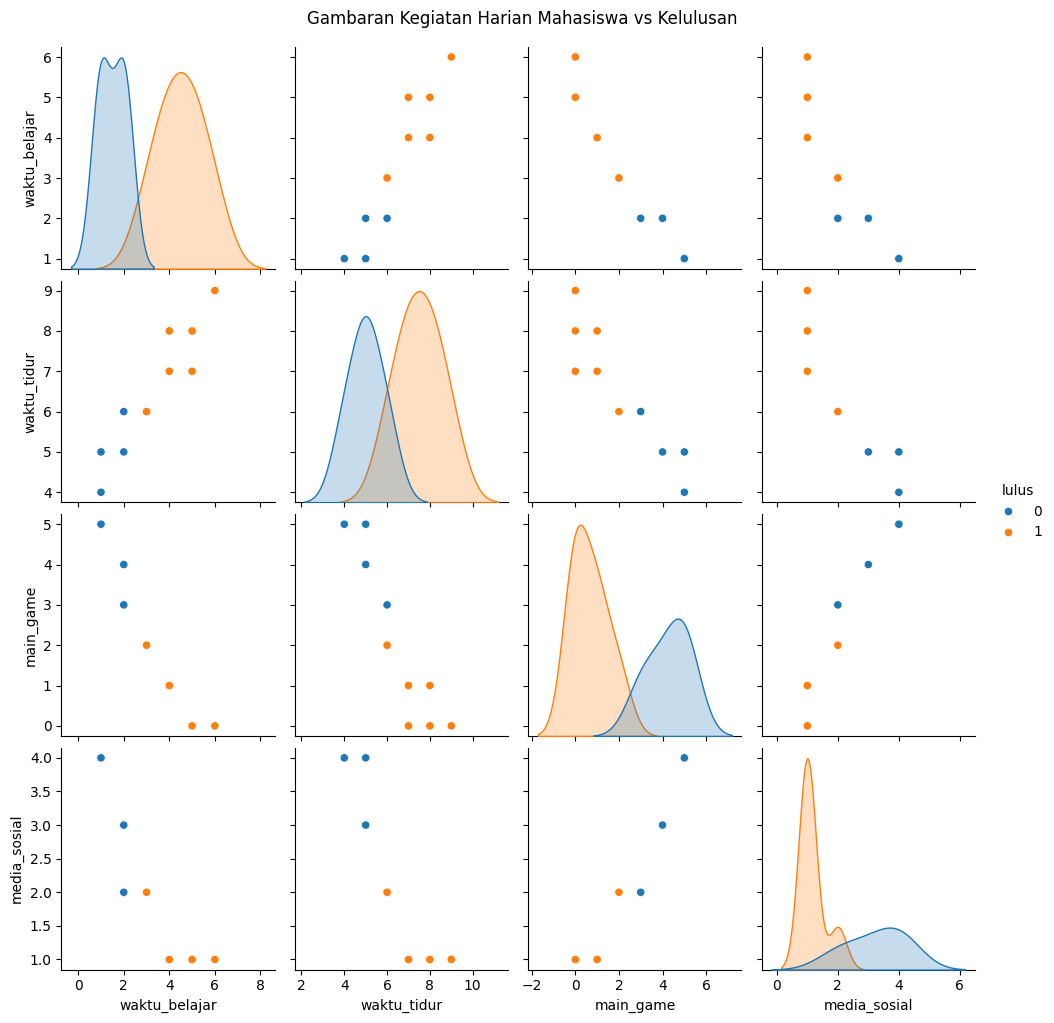

In [11]:
# gambaran keterkaitan antara kelulusan dan fitur
sns.pairplot(df, hue='lulus', diag_kind='kde')
plt.suptitle("Gambaran Kegiatan Harian Mahasiswa vs Kelulusan", y=1.02)
plt.show()